/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


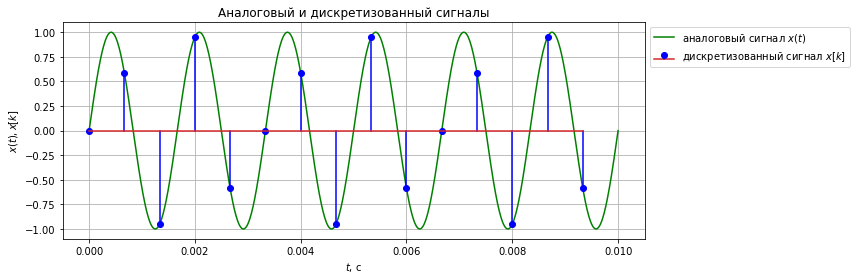

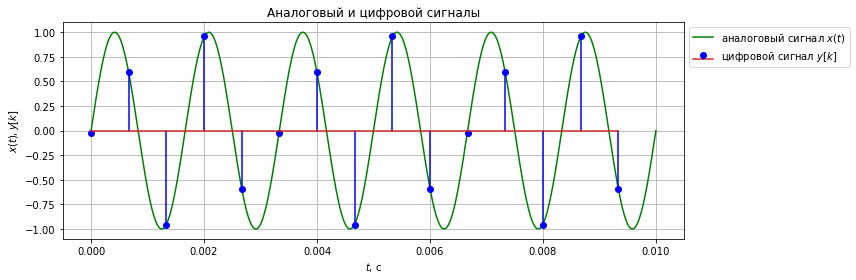

In [ ]:
import numpy as np              
import matplotlib.pyplot as plt 
def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):

    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

N=15                                   
f0=600.0                             
fs=1500.0                             
k=np.arange(N)                       
x=np.sin(2*np.pi*(f0/fs)*k)      
num_levels=50                  

plt.figure(figsize=[12, 4])     
t=np.linspace(0, N/fs, num=1024)        

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                   

plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')            
                                        

plt.grid()                              
plt.xlabel("$t$, c")                    
plt.ylabel("$x(t), x[k]$")              
plt.title("Аналоговый и дискретизованный сигналы") 
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


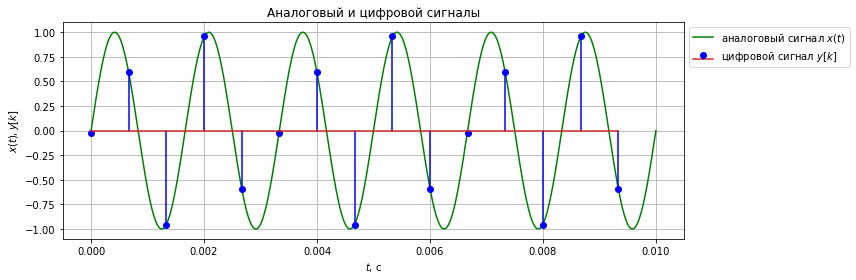

In [ ]:
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

plt.figure(figsize=[12, 4])               
t=np.linspace(0, N/fs, num=1024)          
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                         

plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')                
                                       
                                  
if num_levels<21:                 
    plt.yticks(bins)                     

plt.grid()                               
plt.xlabel("$t$, c")                       
plt.ylabel("$x(t), y[k]$")                 
plt.title("Аналоговый и цифровой сигналы")
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()            


In [ ]:
print(abs(x-y))

[0.02040816 0.00405148 0.00812716 0.00812716 0.00405148 0.02040816
 0.00405148 0.00812716 0.00812716 0.00405148 0.02040816 0.00405148
 0.00812716 0.00812716 0.00405148]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


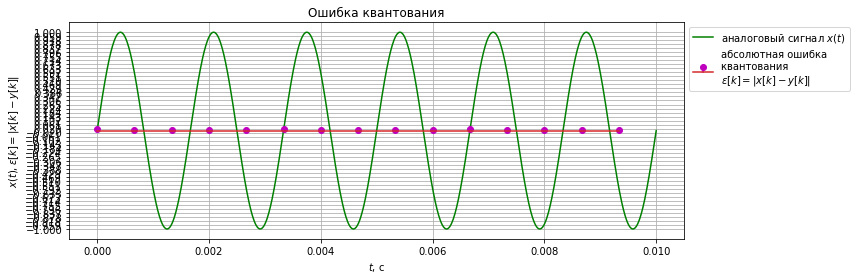

In [ ]:
plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                         
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()